###Autor: OrlandoJr

<div class="row">
  <div class="column">
    <a href="https://www.linkedin.com/in/orlando-junior-874406218/"><img src="https://raw.githubusercontent.com/orlandojrps/Project1/main/linkedin-logo-png-transparent.png" alt="HTML tutorial" width="10%" height="10%"></a>
     <div class="column">
    <a href="https://www.linkedin.com/in/orlando-junior-874406218/"><img src="https://raw.githubusercontent.com/orlandojrps/Project1/main/Canva-logo.jpg" alt="HTML tutorial" width="10%" height="10%"></a>
  </div>
  </div>
 
  
</div>


#**Plastic Waste**
<img width="50%" height="50%" src= "https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/pexels-mali-maeder-802221.jpg" />

### The emergence of the first synthetic plastic, Bakelite, in 1907, marked the inception of the worldwide plastics industry. However, the widespread growth in global plastic production wasn't achieved until the 1950s. In the following 70 years, the annual production of plastics saw an incredible growth of almost 230 times, reaching 460 million tonnes in 2019. According to "https://ourworldindata.org" Mismanaged plastic waste is plastic that is either littered or inadequately disposed.

### Some interesting findings are claimed by the studies: 


### * **Plastic pollution is having a negative impact on our oceans and wildlife health**   

### *   **High-income countries generate more plastic waste per person**

### *   **Most of the plastic that ends up in the ocean comes from rivers in low-to-middle income countries.**

### In this project, we will explore whether there is a correlation between a country's GDP per capita and the amount of mismanaged plastic waste it produces. By analyzing relevant data, we aim to investigate the potential relationship between economic prosperity and environmental sustainability.





<img src="https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/waste.jpg"/>

##**Import Libs and First Data Inspection**
 <img width="200" height="200" src="https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/4078840_2129040.jpg"/>



In [53]:
!pip install geopandas
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt 
import geopandas as gpd
from matplotlib.colors import ListedColormap
import plotly.express as px


%matplotlib inline 

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###**To produce this analysis we will work with 2 different data sets. The first contains information of the countries and the General Plastic Waste, the second data set contains the same information about the countries but it has information specificaly about the Mismanaged Plastic**
<img src ="https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/50508.jpg" width="40%" height="40%" >

##**Load 1st Data Set - General Plastic Waste**


In [54]:
# Here we opted to read the csv file from a raw Github link which is a great and easy way to load data into notebooks 
df = pd.read_csv('https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/data/waste.csv')

In [55]:
# Displaying first 5 rows
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


##**Data Dictionary - General Plastic Waste**
<img src ="https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/3d-open-book-with-purple-cover-bookmark.jpg"/>

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Class</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Entity</td>
      <td>Character</td>
      <td>Country Name</td>
    </tr>
    <tr>
      <td>Code</td>
      <td>Character</td>
      <td>3 Letter country code</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>Integer (date)</td>
      <td>Year</td>
    </tr>
    <tr>
      <td>Per capita mismanaged plastic waste (kg per day)</td>
      <td>double</td>
      <td>Amount of plastic waste per capita in kg/day</td>
    </tr>
    <tr>
      <td>GDP per capita</td>
      <td>Double</td>
      <td>GDP per capita constant 2011 international $, rate</td>
    </tr>
    <tr>
      <td>Total Population</td>
      <td>double</td>
      <td>Total population according to Gapminder</td>
    </tr>
  </tbody>
</table>


##**Missing Data - General Plastic Waste**
<img src="https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/19198869.jpg" />

In [56]:
# shape of data: 48168 rows distributed in 7 columns 
df.shape

(48168, 7)

In [57]:
# checking null values in data
df.isnull().sum()   

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [58]:
# checking percentage of null values in each column
for column in df.columns:
    print("{} has {:.2f}% null values: ".format(column, (df[column].isnull().sum() / len(df)) * 100 ))
    print("-" * 100)

Entity has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Code has 4.18% null values: 
----------------------------------------------------------------------------------------------------
Year has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Per capita plastic waste (kg/person/day) has 99.61% null values: 
----------------------------------------------------------------------------------------------------
GDP per capita, PPP (constant 2011 international $) has 86.70% null values: 
----------------------------------------------------------------------------------------------------
Total population (Gapminder, HYDE & UN) has 2.67% null values: 
----------------------------------------------------------------------------------------------------
Continent has 99.41% null values: 
---------------------------------------------------------------

In [59]:
# checking info of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [60]:
# renaming column names 
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [61]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [62]:
# removing entities/countries with incomplete/missing data 
incmp_df_idx = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())].index
df.drop(incmp_df_idx, inplace=True)

In [63]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [64]:
df.shape

(48113, 7)

##**Unfortunately the "Continent" column is only informed for year 2015 so we have to copy this data to match 2010 year, when we have both Plastic Waste Data and GDP**


In [65]:
# retrieving rows in which year == 2010
df_2010 = df[df['Year'] == 2010]
df_2010 = df_2010.drop(columns='Continent')
# retrieving continent name in which year == 2015
df_2015 = df[df['Year'] == 2015]
df_2010['Continent'] = df_2015['Continent'].values

In [66]:
df_2010.head(10)

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,Asia
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,Europe
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,Africa
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,Oceania
1064,Andorra,AND,2010,NaN,NaN,8.400000e+04,Europe
1074,Angola,AGO,2010,0.062,5897.682841,2.335600e+07,Africa
1294,Anguilla,AIA,2010,0.252,NaN,1.300000e+04,North America
1365,Antigua and Barbuda,ATG,2010,0.660,19212.720131,8.800000e+04,North America
1605,Arab World,NaN,2010,NaN,14354.379916,NaN,NaN


In [67]:
df_2010.shape

(287, 7)

In [68]:
# dropping rows with missing Continent values using index
missing_idx = df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_idx, inplace=True)

In [69]:
df_2010

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,29186000.0,Asia
344,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
564,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
844,American Samoa,ASM,2010,NaN,NaN,56000.0,Oceania
1064,Andorra,AND,2010,NaN,NaN,84000.0,Europe
...,...,...,...,...,...,...,...
47270,Wallis and Futuna,WLF,2010,NaN,NaN,13000.0,Oceania
47341,Western Sahara,ESH,2010,NaN,NaN,480000.0,Africa
47503,Yemen,YEM,2010,0.103,4478.743599,23155000.0,Asia
47746,Zambia,ZMB,2010,NaN,3279.277161,13606000.0,Africa


In [70]:
# dropping rows with missing per person waste generation values 
df_2010 = df_2010[df_2010['Waste per person(kg/day)'].notna()]
wa_g = df_2010.reset_index().drop('index', axis=1)

In [71]:
wa_g.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


##**Load 2nd Data Set - Mismanaged Plastic Waste**


In [72]:
# reading 2nd file 
df2 = pd.read_csv('https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/data/mixedwaste.csv')

In [73]:
# displaying first 5 rows of df2 
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


##**Data Dictionary - Mismanaged Plastic Waste**
<img src ="https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/3d-open-book-with-purple-cover-bookmark.jpg"/>



<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Class</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Entity</td>
      <td>Character</td>
      <td>Country Name</td>
    </tr>
    <tr>
      <td>Code</td>
      <td>Character</td>
      <td>3 Letter country code</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>Integer (date)</td>
      <td>Year</td>
    </tr>
    <tr>
      <td>Per capita mismanaged plastic waste (kg per day)</td>
      <td>double</td>
      <td>Amount of mismanaged plastic waste per capita in kg/day</td>
    </tr>
    <tr>
      <td>GDP per capita</td>
      <td>Double</td>
      <td>GDP per capita constant 2011 international $, rate</td>
    </tr>
    <tr>
      <td>Total Population</td>
      <td>double</td>
      <td>Total population according to Gapminder</td>
    </tr>
  </tbody>
</table>


##**Missing Data - Mismanaged Plastic Waste**
<img src="https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/19198869.jpg" />


In [74]:
# checking null values in data
df2.isnull().sum()   

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita mismanaged plastic waste                    47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [75]:
# checking percentage of null values in each column
for column in df2.columns:
    print("{} has {:.2f}% null values: ".format(column, (df2[column].isnull().sum() / len(df2)) * 100 ))
    print("-" * 100)

Entity has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Code has 4.18% null values: 
----------------------------------------------------------------------------------------------------
Year has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Per capita mismanaged plastic waste has 99.61% null values: 
----------------------------------------------------------------------------------------------------
GDP per capita, PPP (constant 2011 international $) has 86.70% null values: 
----------------------------------------------------------------------------------------------------
Total population (Gapminder, HYDE & UN) has 2.67% null values: 
----------------------------------------------------------------------------------------------------
Continent has 99.41% null values: 
--------------------------------------------------------------------

In [76]:
# renaming columns
df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [77]:
# dropping Continent column 
df2.drop('Continent', axis=1, inplace=True)

In [78]:
#retrieving rows in which year == 2010
df2_2010 = df2[df2.Year == 2010]
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [79]:
# dropping rows with missing mismanaged waste values 
df2_2010 = df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].isna() != True]

# reset index 
w_m = df2_2010.reset_index().drop('index', axis=1)

In [80]:
w_m.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [81]:
# merging w_m and wa_g 
df_plastic_waste = pd.merge(wa_g, w_m, how='inner')

In [82]:
# displaying data 
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


###Data Transform

In [83]:
# converting column names into list 
df_plastic_waste.columns.tolist()

# column names 
col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']

df_plastic_waste = df_plastic_waste[col_names]

# rounding the values per person
df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)

# changing data type 
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)

In [84]:
'''Generating Total waste and Total mismanaged waste by country'''
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

In [85]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


In [86]:
df_plastic_waste.sort_values(by=['Mismanaged waste per person(kg/day)'], ascending=False).head(10)

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
156,Sri Lanka,LKA,2010,0.36,0.30,8529.571442,20262000,Asia,2.662427e+09,2.218689e+09
177,Vanuatu,VUT,2010,0.30,0.24,2948.032937,236000,Oceania,2.584200e+07,2.067360e+07
71,Guyana,GUY,2010,0.59,0.22,5847.857255,749000,South America,1.612972e+08,6.014470e+07
97,Maldives,MDV,2010,0.32,0.22,12005.504618,366000,Asia,4.274880e+07,2.938980e+07
167,Trinidad and Tobago,TTO,2010,0.29,0.19,31260.907047,1328000,North America,1.405688e+08,9.209680e+07
166,Tonga,TON,2010,0.22,0.18,4984.193630,104000,Oceania,8.351200e+06,6.832800e+06
30,Comoros,COM,2010,0.20,0.17,1412.502687,690000,Africa,5.037000e+07,4.281450e+07
99,Marshall Islands,MHL,2010,0.19,0.15,3479.155303,56000,Oceania,3.883600e+06,3.066000e+06
52,Fiji,FJI,2010,0.19,0.15,7352.088360,860000,Oceania,5.964100e+07,4.708500e+07
146,Seychelles,SYC,2010,0.36,0.14,20365.118933,91000,Africa,1.195740e+07,4.650100e+06


In [114]:
top_5_mismanaged = df_plastic_waste.sort_values(by=['Mismanaged waste per person(kg/day)'], ascending=False).head(5)
top_5_GDP = df_plastic_waste.sort_values(by=['GDP per capita in PPP'], ascending=False).head(5)
top_5_waste = df_plastic_waste.sort_values(by=['Total waste(kgs/year)'], ascending=False).head(5)
top_5_waste_per_person = df_plastic_waste.sort_values(by=['Waste per person(kg/day)'], ascending=False).head(5)
top_5_mismanaged_total = df_plastic_waste.sort_values(by=['Total waste mismanaged(kgs/year)'], ascending=False).head(5)

##Exploratory Data Analysis - EDA
<img src = "https://raw.githubusercontent.com/orlandojrps/PlasticWaste/main/images/research.png"  width="30%" />


In [120]:
# Create a bar plot with plotly
fig = px.bar(df_plastic_waste.sort_values(by=['Total Population'], ascending=False).head(5), x='Entity', y='Total Population', title='Top 5 Countries by Population')

# Add a hover function to show a world map when hovering over a bar
fig.update_traces(hovertemplate="<br>".join([
    "Country: %{x}",
    "Total Population: %{y}",
    "<extra></extra>"])
    )

# Show the plot
fig.show()


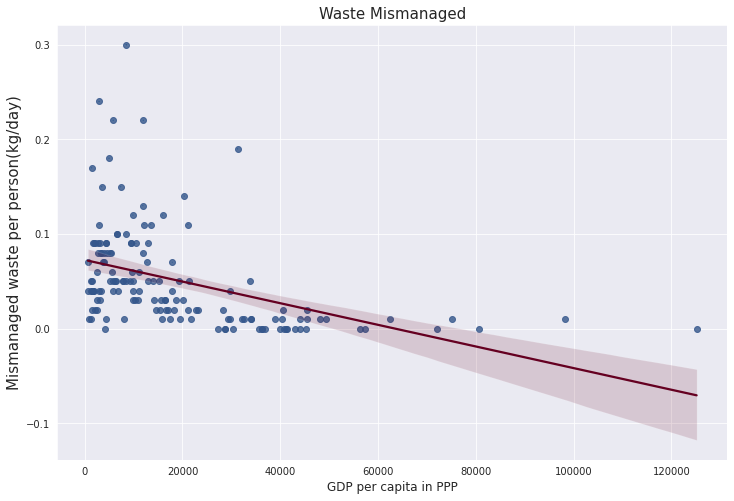

In [87]:
''' scatter plot graph '''

plt.figure(1, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Mismanaged waste per person(kg/day)'],s=df_plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged', fontsize=15)
plt.ylabel('Mismanaged waste', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()

In [105]:
top_5_mismanaged = df_plastic_waste.sort_values(by=['Mismanaged waste per person(kg/day)'], ascending=False).head(5)
top_5_GDP = df_plastic_waste.sort_values(by=['GDP per capita in PPP'], ascending=False).head(5)
top_5_waste = df_plastic_waste.sort_values(by=['Total waste(kgs/year)'], ascending=False).head(5)
top_5_waste_per_person = df_plastic_waste.sort_values(by=['Waste per person(kg/day)'], ascending=False).head(5)
top_5_mismanaged_total = df_plastic_waste.sort_values(by=['Total waste mismanaged(kgs/year)'], ascending=False).head(5)

In [96]:
top_5_mismanaged

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
156,Sri Lanka,LKA,2010,0.36,0.30,8529.571442,20262000,Asia,2.662427e+09,2.218689e+09
177,Vanuatu,VUT,2010,0.30,0.24,2948.032937,236000,Oceania,2.584200e+07,2.067360e+07
71,Guyana,GUY,2010,0.59,0.22,5847.857255,749000,South America,1.612972e+08,6.014470e+07
97,Maldives,MDV,2010,0.32,0.22,12005.504618,366000,Asia,4.274880e+07,2.938980e+07
167,Trinidad and Tobago,TTO,2010,0.29,0.19,31260.907047,1328000,North America,1.405688e+08,9.209680e+07


In [100]:
top_5_waste_per_person

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
88,Kuwait,KWT,2010,0.69,0.01,75204.145117,2992000,Asia,753535200.0,10920800.0
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,21199200.0,1606000.0
138,Saint Kitts and Nevis,KNA,2010,0.65,0.05,21412.201453,49000,North America,11625250.0,894250.0
71,Guyana,GUY,2010,0.59,0.22,5847.857255,749000,South America,161297150.0,60144700.0
11,Barbados,BRB,2010,0.57,0.03,16417.962452,282000,North America,58670100.0,3087900.0


In [106]:
top_5_mismanaged_total

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
28,China,CHN,2010,0.12,0.09,9525.818483,1368811008,Asia,5.995392e+10,4.496544e+10
123,Pakistan,PAK,2010,0.10,0.09,4283.607312,179424992,Asia,6.549012e+09,5.894111e+09
117,Nigeria,NGA,2010,0.10,0.08,5150.158818,158503008,Africa,5.785360e+09,4.628288e+09
76,India,IND,2010,0.01,0.01,4404.697005,1234280960,Asia,4.505126e+09,4.505126e+09
77,Indonesia,IDN,2010,0.06,0.05,8433.497357,241834000,Asia,5.296165e+09,4.413470e+09


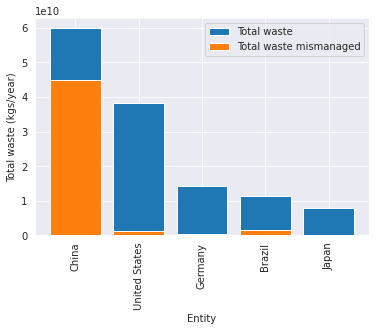

In [112]:
# create a bar plot for Total waste and Total waste mismanaged
plt.bar(top_5_waste["Entity"], top_5_waste["Total waste(kgs/year)"], label="Total waste")
plt.bar(top_5_waste["Entity"], top_5_waste["Total waste mismanaged(kgs/year)"], label="Total waste mismanaged")

# set the axis labels and the legend
plt.xlabel("Entity")
plt.ylabel("Total waste (kgs/year)")
plt.legend()

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# show the plot
plt.show()

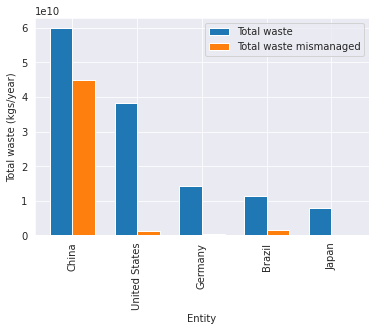

In [113]:
# set the width of the bars
barWidth = 0.35

# set the positions of the bars
r1 = range(len(top_5_waste["Entity"]))
r2 = [x + barWidth for x in r1]

# create a bar plot for Total waste and Total waste mismanaged
plt.bar(r1, top_5_waste["Total waste(kgs/year)"], width=barWidth, label="Total waste")
plt.bar(r2, top_5_waste["Total waste mismanaged(kgs/year)"], width=barWidth, label="Total waste mismanaged")

# set the axis labels and the legend
plt.xlabel("Entity")
plt.ylabel("Total waste (kgs/year)")
plt.legend()

# set the x-axis ticks and tick labels
plt.xticks([r + barWidth/2 for r in range(len(top_5_waste["Entity"]))], top_5_waste["Entity"], rotation=90)

# show the plot
plt.show()

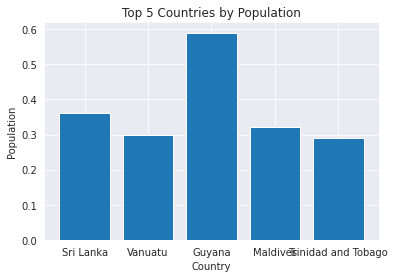

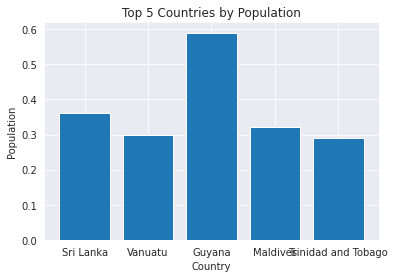

In [90]:
# Create a bar plot
plt.bar(top_5_mismanaged['Entity'],top_5_mismanaged["Waste per person(kg/day)"])

# Set the chart title and axis labels
plt.title('Top 5 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population')

# Show the chart
plt.show()
plt.bar(top_5_mismanaged['Entity'],top_5_mismanaged["Waste per person(kg/day)"])

# Set the chart title and axis labels
plt.title('Top 5 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population')

# Show the chart

plt.show()

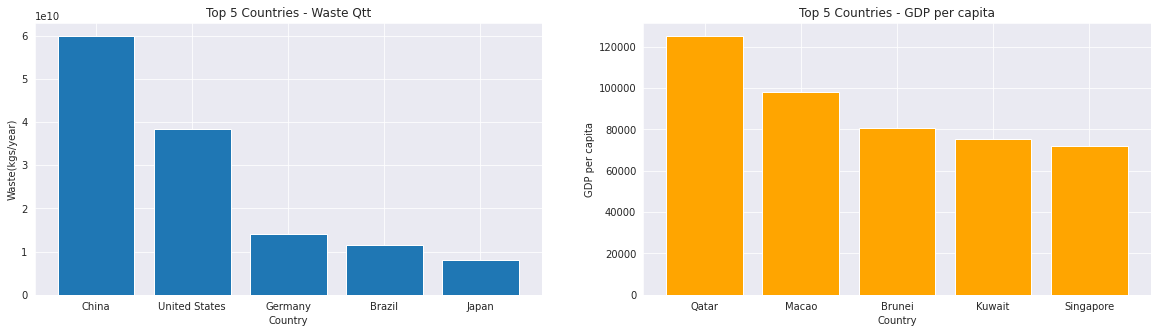

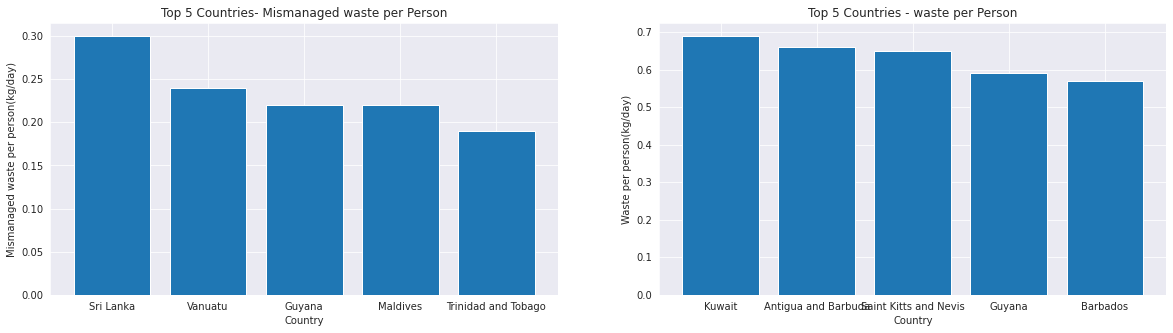

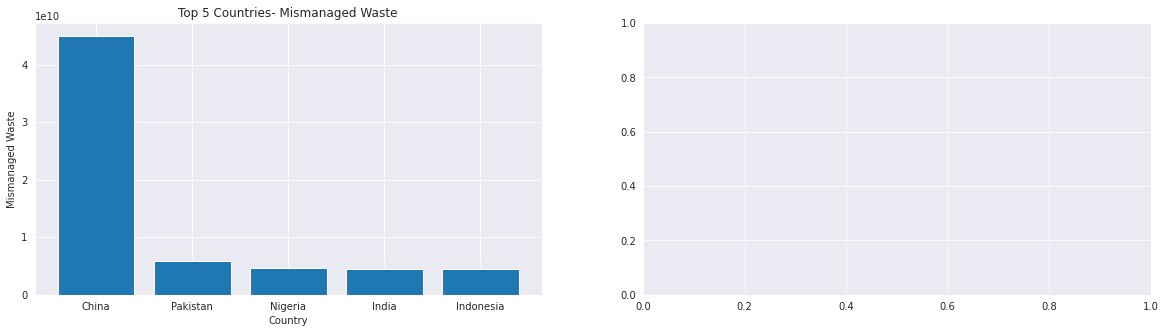

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# First subplot
ax1.bar(top_5_waste['Entity'], top_5_waste["Total waste(kgs/year)"])

# Set the chart title and axis labels
ax1.set_title('Top 5 Countries - Waste Qtt')
ax1.set_xlabel('Country')
ax1.set_ylabel('Waste(kgs/year)')

# Second subplot
ax2.bar(top_5_GDP['Entity'], top_5_GDP["GDP per capita in PPP"], color='orange')

# Set the chart title and axis labels
ax2.set_title('Top 5 Countries - GDP per capita')
ax2.set_xlabel('Country')
ax2.set_ylabel('GDP per capita')

# Show the chart
plt.show()  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# third subplot
ax1.bar(top_5_mismanaged['Entity'], top_5_mismanaged["Mismanaged waste per person(kg/day)"])

# Set the chart title and axis labels
ax1.set_title('Top 5 Countries- Mismanaged waste per Person')
ax1.set_xlabel('Country')
ax1.set_ylabel('Mismanaged waste per person(kg/day)')

# forth  subplot
ax2.bar(top_5_waste_per_person['Entity'], top_5_waste_per_person["Waste per person(kg/day)"])

# Set the chart title and axis labels
ax2.set_title('Top 5 Countries - waste per Person')
ax2.set_xlabel('Country')
ax2.set_ylabel('Waste per person(kg/day)')

 
# Show the chart
plt.show() 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
# 5th subplot
ax1.bar(top_5_mismanaged_total['Entity'], top_5_mismanaged_total["Total waste mismanaged(kgs/year)"])

# Set the chart title and axis labels
ax1.set_title('Top 5 Countries- Mismanaged Waste')
ax1.set_xlabel('Country')
ax1.set_ylabel('Mismanaged Waste')

# Show the chart
plt.show() 

In [104]:
import plotly.express as px
 
# Create a bar plot with plotly
fig = px.bar(top_5_mismanaged, x='Entity', y='Waste per person(kg/day)', title='Top 5 Countries by Population')

# Add a hover function to show a world map when hovering over a bar
fig.update_traces(hovertemplate="<br>".join([
    "Country: %{x}",
    "Waste per person: %{y} kg/day",
    "<extra></extra>"])
    )

# Show the plot
fig.show()


In [105]:
# Create the first bar plot
fig1 = px.bar(top_5_mismanaged, x='Entity', y='Waste per person(kg/day)', title='Top 5 Countries by Population')

# Add a hover function to show a world map when hovering over a bar
fig1.update_traces(hovertemplate="<br>".join([
    "Country: %{x}",
    "Waste per person: %{y} kg/day",
    "<extra></extra>"])
    )

# Create the second bar plot
fig2 = px.bar(top_5_GDP, x='Entity', y='GDP per capita in PPP', title='Top 5 Countries by GDP per capita')

# Add a hover function to show a world map when hovering over a bar
fig2.update_traces(hovertemplate="<br>".join([
    "Country: %{x}",
    "GDP per capita: %{y} PPP",
    "<extra></extra>"])
    )

# Display the plots side by side
fig = px.subplots([[fig1, fig2]])
fig.show()

AttributeError: ignored

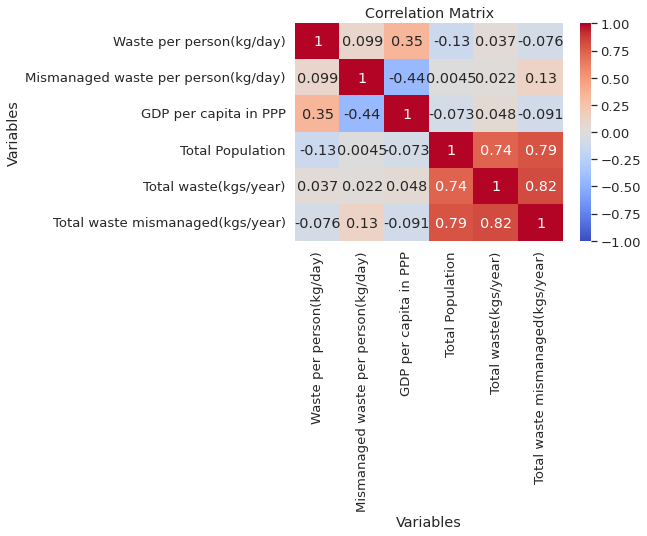

In [60]:

# select the relevant columns for the matrix
cols = ['Waste per person(kg/day)', 'Mismanaged waste per person(kg/day)',
        'GDP per capita in PPP', 'Total Population', 'Total waste(kgs/year)',
        'Total waste mismanaged(kgs/year)']

# calculate the correlation matrix using the Pearson method
corr_matrix = df_plastic_waste[cols].corr(method='pearson')

# plot the heatmap using Seaborn
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# add title and labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# display the heatmap
plt.show()

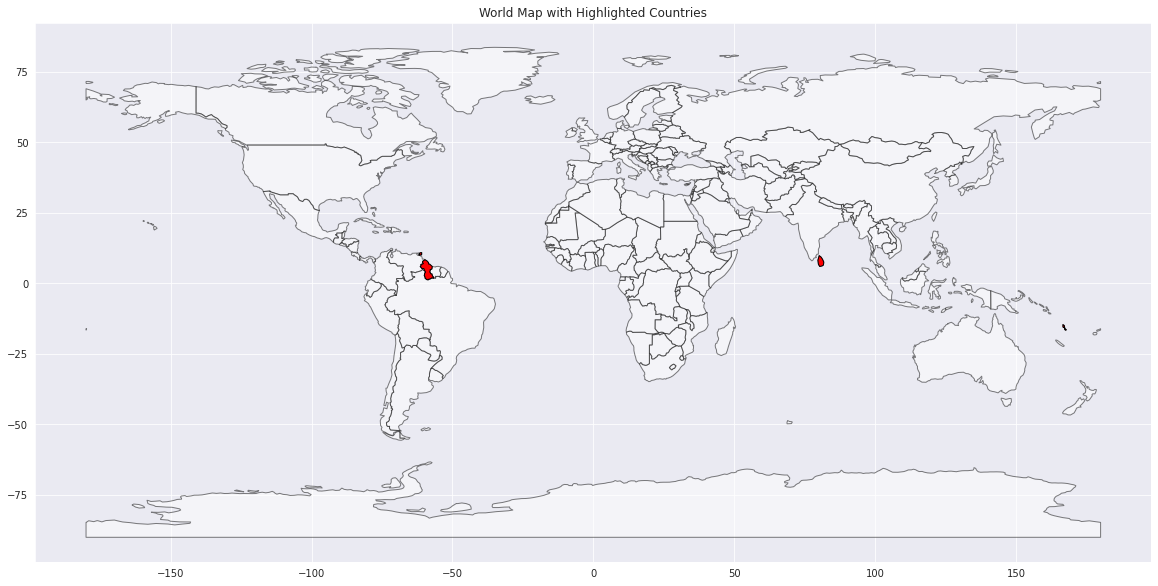

In [54]:
# List of countries to highlight
country_list = top_5_mismanaged['Entity']

# Load world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a new column to mark the countries in the list
world_map['highlight'] = world_map['name'].isin(country_list)


# Plot the map
fig, ax = plt.subplots(figsize=(20, 10))
world_map.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
world_map[world_map['highlight'] == True].plot(ax=ax, color='red', edgecolor='black')
ax.set_title('World Map with Highlighted Countries')

plt.show()

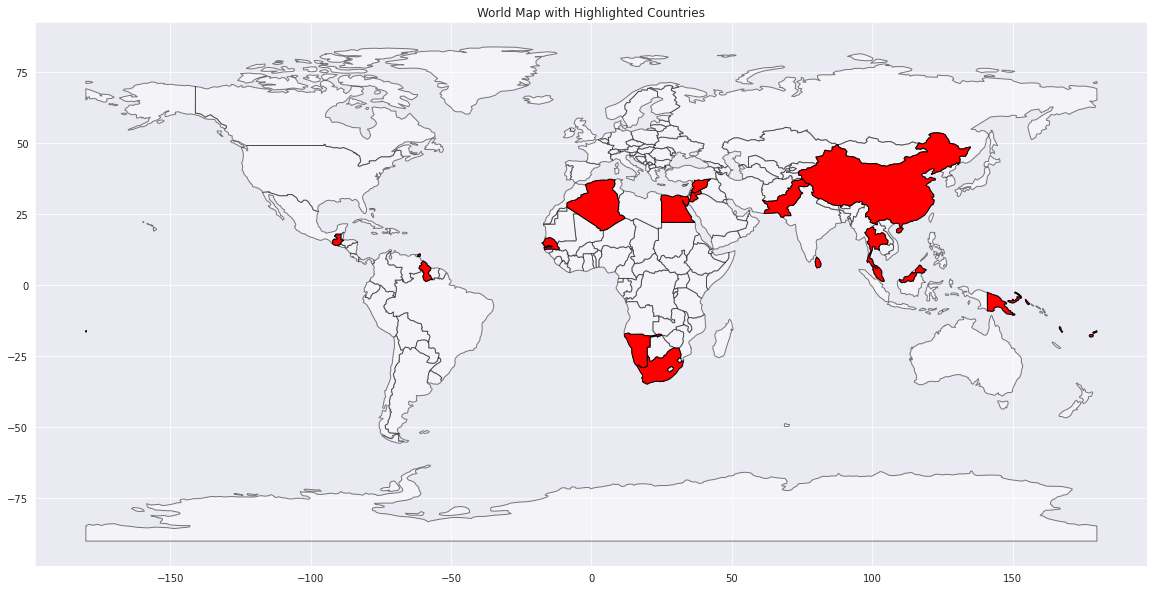

In [ ]:
# List of countries to highlight
country_list = top_5_mismanaged

# Load world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a new column to mark the countries in the list
world_map['highlight'] = world_map['name'].isin(country_list)


# Plot the map
fig, ax = plt.subplots(figsize=(20, 10))
world_map.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
world_map[world_map['highlight'] == True].plot(ax=ax, color='red', edgecolor='black')
ax.set_title('World Map with Highlighted Countries')

plt.show()

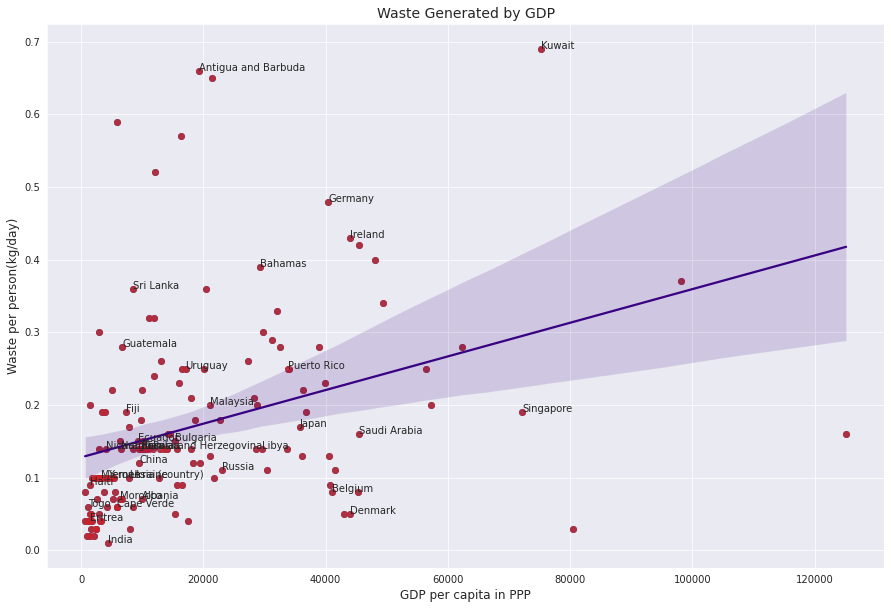

In [41]:
''' scatter plot '''
plt.figure(2, figsize=(15,10))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

for i, row in df_plastic_waste.iterrows():
  if i % 4 == 0:
    plt.annotate(row['Entity'], (row['GDP per capita in PPP'], row['Waste per person(kg/day)']))

plt.show()

ValueError: ignored

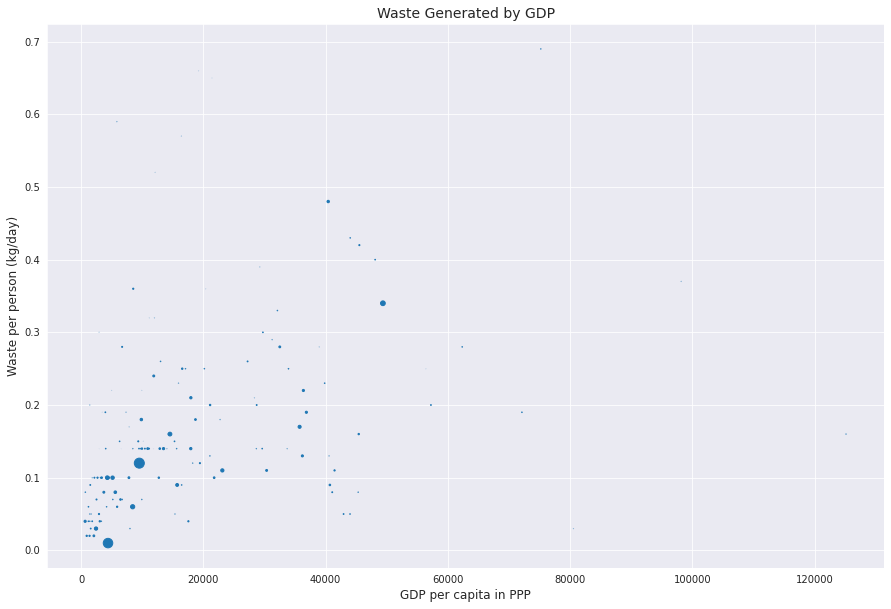

In [47]:
# Calculate the size of each dot based on population
pop = np.array(df_plastic_waste['Population'])
size = 100 * pop / np.max(pop)

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste per person(kg/day)'], s=size)
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person (kg/day)', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

# Add regression line
sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste per person(kg/day)'],
            scatter_kws={'color': '#CD212A', 's': size}, line_kws={'color': '#380282'})

# Add country names
for i, row in df_plastic_waste.iterrows():
    if i % 4 == 0:
        plt.annotate(row['Entity'], (row['GDP per capita in PPP'], row['Waste per person(kg/day)']))

plt.show()